## Chapter 3: [Imaging](Imaging.ipynb)

<hr style="height:1px;border-top:4px solid #FF8200" />

# Resolution 


part of 

## [Analysis of Transmission Electron Microscope Data](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)



by Gerd Duscher, 2019

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes

## Load important packages
We will use a Bessel function from the scipy.special package as well as numpy and matplotlib (installed with magic comand **%pylab**.

In [1]:
%pylab --no-import-all notebook

import scipy.special

Populating the interactive namespace from numpy and matplotlib


The Intensity  of the Fraunhofer diffraction pattern of a circular aperture (the Airy pattern) is given by the squared modulus of the Fourier transform of the circular aperture:


$$I(\theta) = I_0 \left ( \frac{2 J_1(ka \sin \theta)}{ka \sin \theta} \right )^2 = I_0 \left ( \frac{2 J_1(x)}{x} \right )^2$$

with 
- $J_1$ being the [Bessel Function of the first kind of order one](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.j1.html#scipy.special.j1), 
- $k = {1}/{\lambda}$ is the wavenumber, 
- $a$ is the radius of the aperture, and 
- $\theta$ is the angle of observation, i.e. the angle between the axis of the circular aperture and the line between aperture center and observation point. 
- $x = ka \sin \theta $

The electron probe of a STEM is in first order an Airy pattern.



Below, we plot the normalized Airy pattern where we set $I_0$ to 1.

Please, change the shift value to see the effect.

<IPython.core.display.Javascript object>


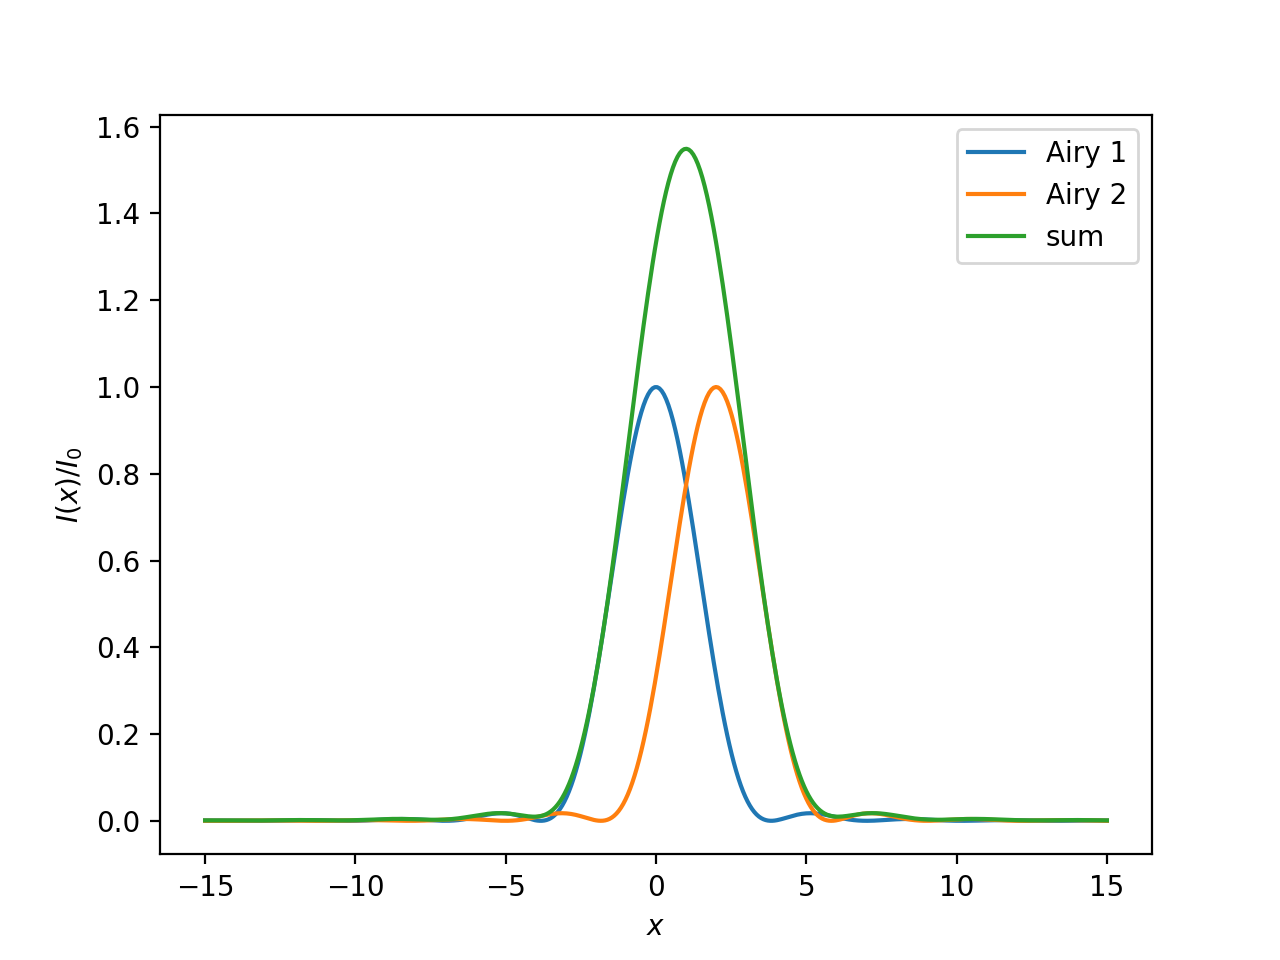

In [2]:
# The x-values we want
x = x1 = np.linspace(-15, 15, 400)

# The normalized intensity: I_0 = 1
norm_I = 4 * (scipy.special.j1(x1) / x1)**2
shift = 2
norm_I_shifted = 4 * (scipy.special.j1(x1-shift) / (x1-shift))**2

plt.figure()
plt.plot(x, norm_I, label='Airy 1')
plt.plot(x, norm_I_shifted, label='Airy 2')
plt.plot(x, norm_I_shifted+norm_I, label='sum')

plt.xlabel('$x$')
plt.ylabel('$I(x)/I_0$')
plt.legend();

## Point Resolution 

The **Rayleigh Criterion** gives us the point resolution, which is the distance two objects have to be seperated to be distinguished (wihtout prior knowledge of the shape). This Rayleigh criterion is based on the first zero fo the Bessel function $J_1(x)$, which occurs at $x+0 = k a \sin \theta ≈ 3.8317$.

This will give the well know form of the Rayleigh Criterion for the angular resolution limit $\theta_R$:

$$ \sin \theta_R \approx \frac{3.83}{ka} = \frac{3.83 \lambda}{2 \pi a} = 1.22 \frac{\lambda}{2a} = 1.22 \frac{\lambda}{d}$$

with:
- $\lambda$: wavelength
- $a$: aperture radius
- $d$: aperture diameter


If one knows the shape and/or size of the objects one can determine features seperated less than the resolution limit. This is known as the information limit.


## In 2D
Please note that I use quite a low gamma value, set gamma to one and see what happens.

I set the distance (shift parameter) at the Rayleigh criterium, please change the shift value (by adding and subtracting a number (-3 to 5) to see what happens. 

<IPython.core.display.Javascript object>


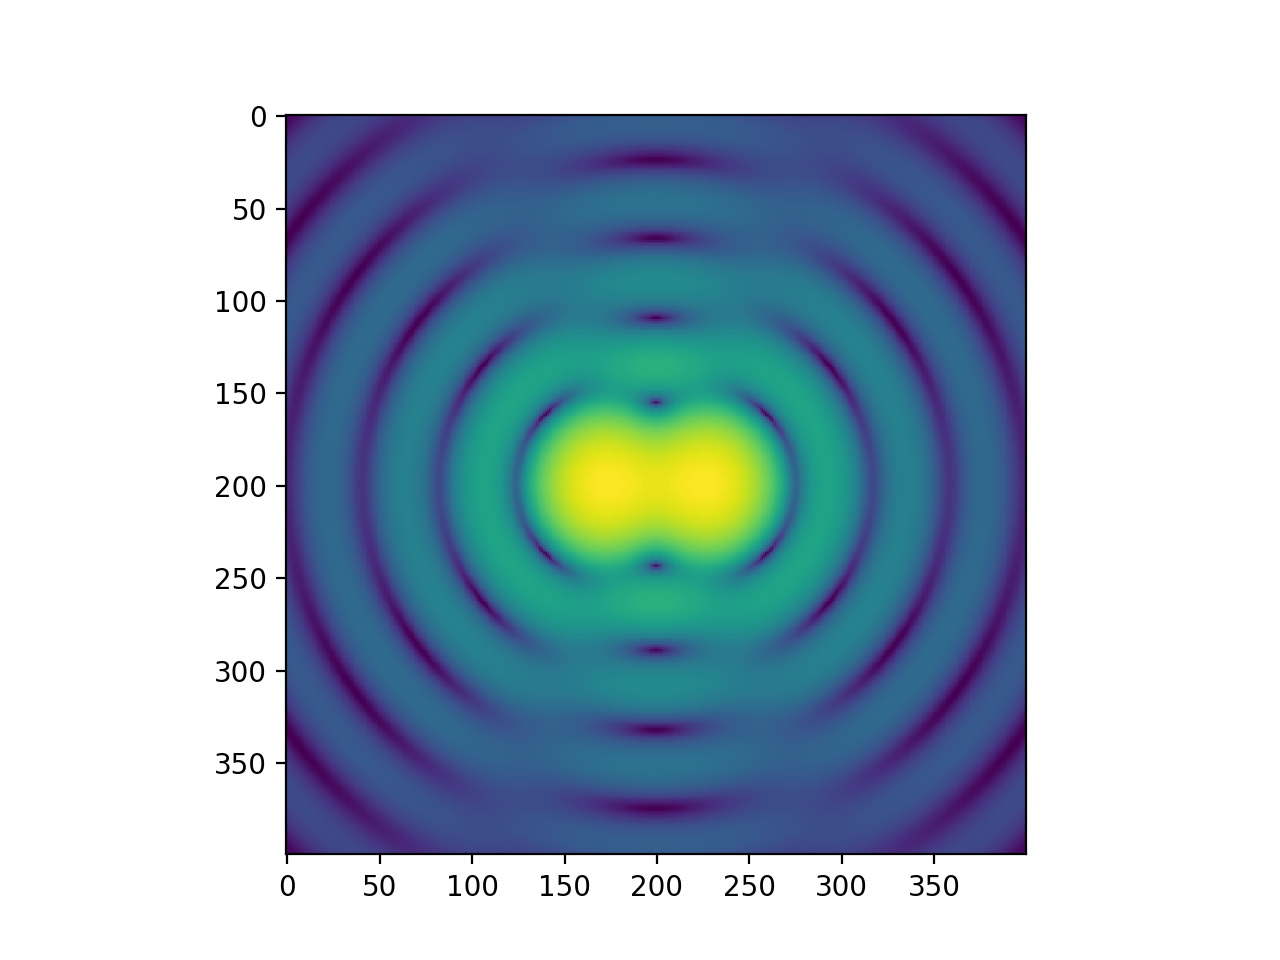

In [3]:
shift = 3.8317 + 0.0
[x,y] = np.meshgrid(x1,x1);

rr1 = np.sqrt((x+shift/2)**2+y**2)
rr2 = np.sqrt((x-shift/2)**2+y**2)
I1 = 4 * (scipy.special.j1(rr1) / rr1)**2
I2 = 4 * (scipy.special.j1(rr2) / rr2)**2
plt.figure()
gamma = 0.0001
plt.imshow(np.log2(gamma+I2+I1)); # please note that I useaquite high gamma value, set gamma to one and see.

# Composite figure

Let's put all the above together in one plot.

<IPython.core.display.Javascript object>


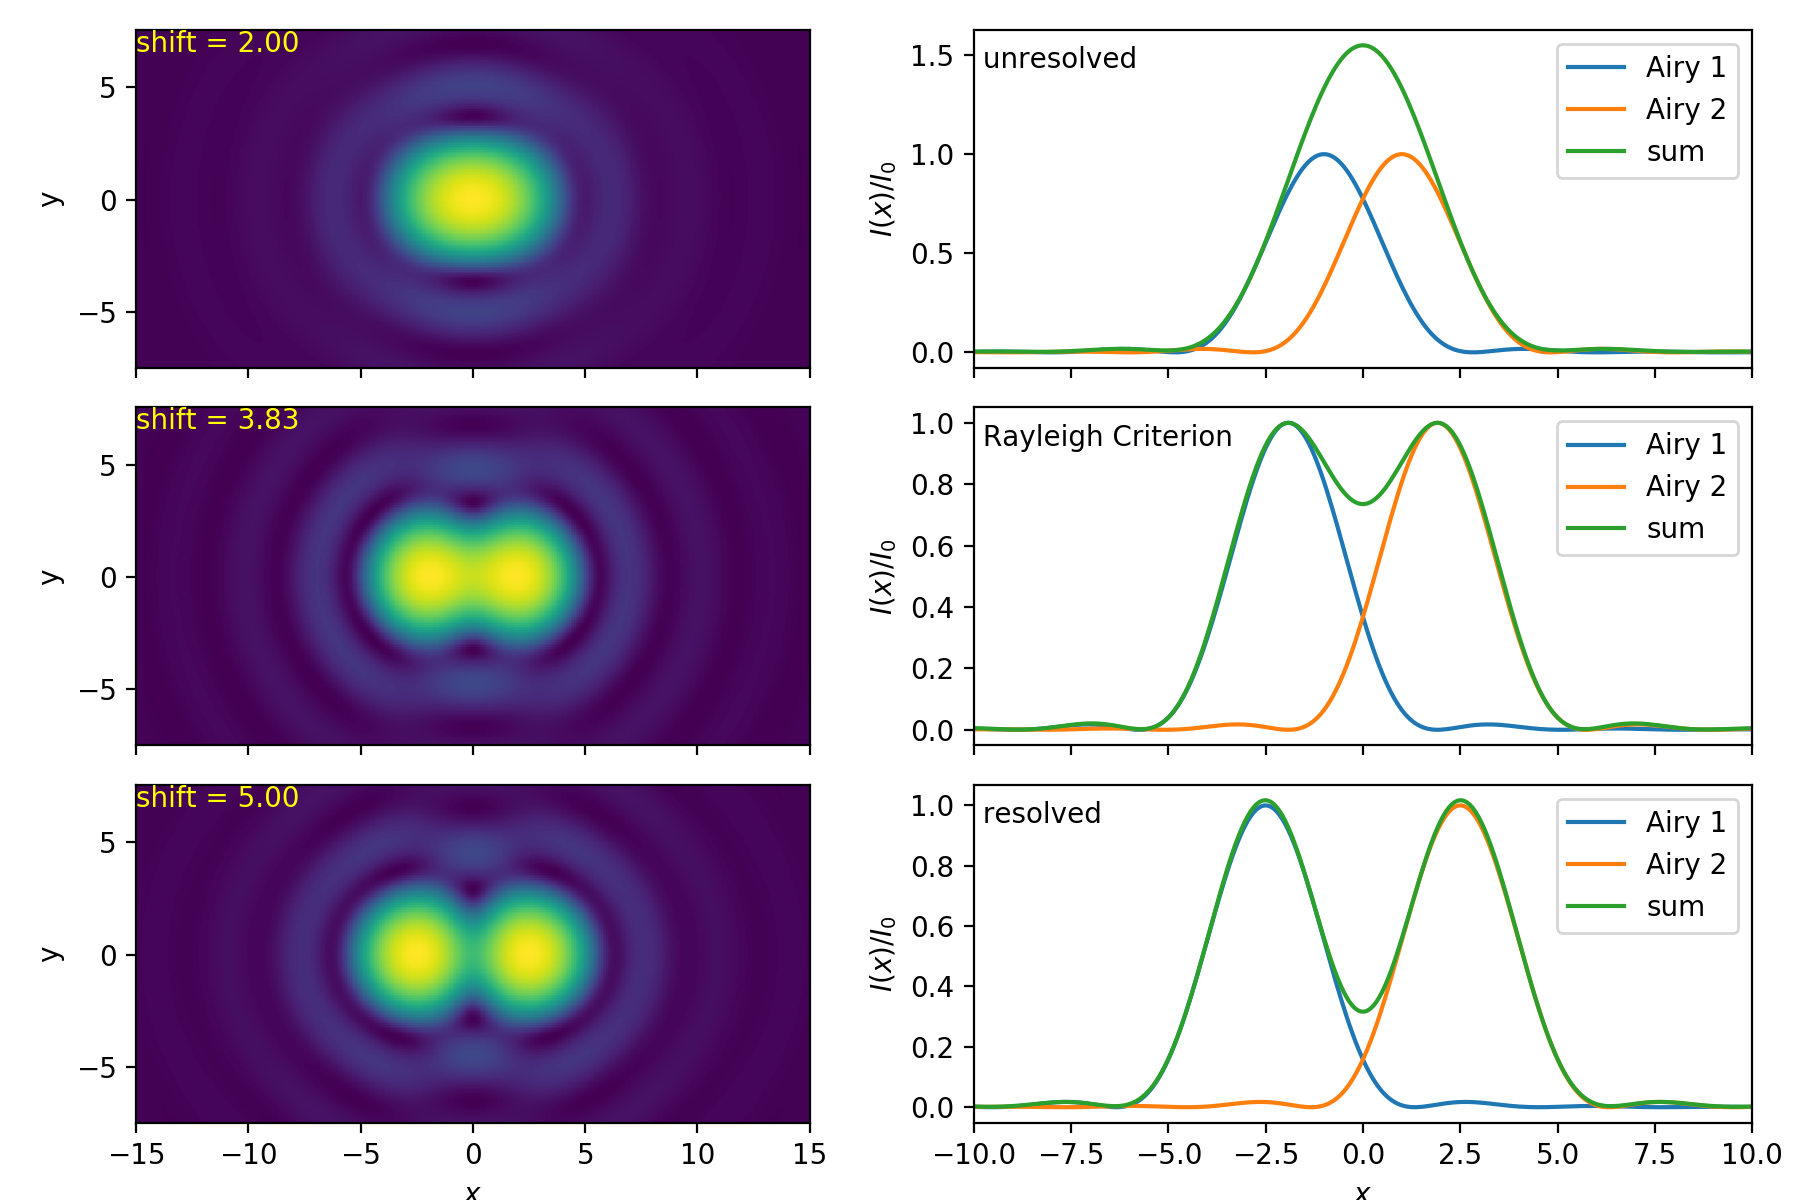

In [4]:
shifts = [2,3.8317,5] # list of shit values
text= [' unresolved', ' Rayleigh Criterion', ' resolved']
gamma = 0.03       # gamma value for 2D plots


fig,ax = plt.subplots(3,2, figsize=(9,6))
for i in range(3): 
    shift = shifts[i]  
   
    ## image
    rr1 = np.sqrt((x+shift/2)**2+y**2)
    rr2 = np.sqrt((x-shift/2)**2+y**2)
    I1  = 4 * (scipy.special.j1(rr1) / rr1)**2
    I2 = 4 * (scipy.special.j1(rr2) / rr2)**2
    ax[i,0].imshow(np.log2(gamma+I2+I1)[100:300,:], extent =[x1[0],x1[-1],x1[100],x1[300]])
    ax[i,0].text(x1[0],x1[300],f'shift = {shift:.2f}', color = 'yellow', verticalalignment = 'top');
    ax[i,0].set_ylabel('y')
    
    ## intensity plot
    norm_I1 = 4 * (scipy.special.j1((x1+shift/2)) / (x1+shift/2))**2
    norm_I2 = 4 * (scipy.special.j1((x1-shift/2)) / (x1-shift/2))**2
    ax[i,1].plot(x1, norm_I1, label='Airy 1')
    ax[i,1].plot(x1, norm_I2, label='Airy 2')
    ax[i,1].plot(x1, norm_I1+norm_I2, label='sum')
    ax[i,1].set_xlim(-10,10)
    _,ymax = ax[i,1].get_ylim()
    ax[i,1].text(-10,ymax*.95,text[i], color = 'black', verticalalignment = 'top');
    
    ax[i,1].set_ylabel('$I(x)/I_0$')
    ax[i,1].legend();
    
    if i<2:
        ax[i,0].xaxis.set_ticklabels([])
        ax[i,1].xaxis.set_ticklabels([])
plt.tight_layout();

ax[2,0].set_xlabel('$x$')
ax[2,1].set_xlabel('$x$');

## Summary

Here we visualized the Rayleigh Criterion.

